<center><h1><b><u>Analysis of Graphs</u></b></h1></center>

## __Importing Libraries, Classes, and Functions__

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx #focuses on network analysis and graph theory; can create/visualize graphs
import inspect #for viewing source code

In [290]:
#getsource finds file of Code, start and end lines of def and outputs them
source_code = inspect.getsource(nx.Graph)

#with open('../source.py', 'w') as file:
    #file.write(source_code)

## __Undirected Graph Implementations__

### __Custom One Hot Encoder__

In [412]:
class CustomOneHotEncoder:
    def __init__(self):
        self._categories = None #fit-related attributes not calculated in __init__
        self._cat_idx_map = None

    def fit(self, categories): #"learning" the unique categories
        self._categories = sorted(set(categories)) #encoding based lexographically usually; e.g. ['Carbon', 'Hydrogen']
        self._col_idx_map = {category: idx for idx, category in enumerate(self._categories)} #Indexing each category for column index {Carbon:0, Hydrogen, 1}
    
    def transform(self, category):
        one_hot = np.zeros(len(self._categories))
        one_hot[self._col_idx_map[category]] = 1
        return one_hot
    
    def fit_transform(self, categories):
        self.fit(categories)
        return [self.transform(category) for category in categories]


In [413]:
categories = ['Carbon', 'Hydrogen']
encoder = CustomOneHotEncoder()
#encoded_data = encoder.fit_transform(data)
encoder.fit(categories)
encoded = encoder.transform('Carbon') #needs to be list because transform expects 2D array
print(encoded)

[1. 0.]


### __Matrix Implementation__

In [293]:
'''Presence of node implicit in matrix representation.'''

class GraphM:
    def __init__(self, num_nodes = 5):
        self._num_nodes = num_nodes
        self._adj_matrix = np.zeros((num_nodes, num_nodes))
        self._node_features = np.zeros((num_nodes, num_nodes))
        self._edge_features = {} #node_label: identifier/index of adj matrix
        self._index_counter = 0

    def add_node(self, node_label):
        if self._index_counter < self._num_nodes: #nth node is n-1 index
            self._node_indices[node_label] = self._index_counter # {A: 0, B: 1...}
            self._index_counter += 1
        else:
            print("Not enough space allocated.")

    def add_edge(self, node1, node2, weight):
        
        if node1 not in self._node_indices:
            self.add_node(node1)
        if node2 not in self._node_indices:
            self.add_node(node2)
        i, j = self._node_indices[node1], self._node_indices[node2]
        self._adj_matrix[i, j] = weight
        self._adj_matrix[j, i] = weight  #Edge goes both ways for undirected

    @property
    def display_matrix(self):
        return self._adj_matrix

    def is_connection(self, i, j):
        return self._adj_matrix[i, j] != 0
    
    def to_nx(self):
        G = nx.Graph()
        
        for node_label in self._node_indices: #accesses keys without .items()
            G.add_node(node_label) #G is using nx methods; adjacency list by default

        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                weight = self._adj_matrix[i, j]
                if self.is_connection(i,j):
                    G.add_edge(node1, node2, weight=weight) #keyword argument added to attribute dict
        
        return G
    
    def visualize(self):
        G = self.to_nx()
        pos = nx.spring_layout(G) #computes positions of the nodes on the graph so theres as few edge crossings possible and edge are around same length; pos = {label: [x,y], ...}

        edges = G.edges(data=True) #[(A, B, {edgeattribute1: 2}), ...]; can get attributes with methods that go through dicts in each tuple
        weights = [attribute['weight'] for node1, node2, attribute in edges] #list of the weights

        plt.figure(figsize=(6,6))
        nx.draw(G, pos, with_labels=True, width = weights, node_color='#ff91af', edge_color='pink', font_size = 9, node_size = 2000) 
        
        edge_labels = nx.get_edge_attributes(G, 'weight') #{(A,B): weight}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    def __str__(self):
        print("")
        connections = [] #printing connection of every node
        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                ij_connection = self._adj_matrix[i, j]
                if self.is_connection(i, j):
                    connections.append(f"{node1}--{node2}, Weight: {ij_connection}")
        return "\n".join(connections)

### __Dictionary Implementation__

In [294]:
'''Weight of edge stored in the adjacency matrix. Attempting to mimic MUTAG.'''

class GraphM:
    def __init__(self, num_nodes = 5):
        self._num_nodes = num_nodes
        self._adj_matrix = np.zeros((num_nodes, num_nodes))
        self._node_indices = {} #node_label: identifier/index of adj matrix
        self._index_counter = 0

    def add_node(self, node_label):
        if self._index_counter < self._num_nodes: #nth node is n-1 index
            self._node_indices[node_label] = self._index_counter # {A: 0, B: 1...}
            self._index_counter += 1
        else:
            print("Not enough space allocated.")

    def add_edge(self, node1, node2, weight):
        
        if node1 not in self._node_indices:
            self.add_node(node1)
        if node2 not in self._node_indices:
            self.add_node(node2)
        i, j = self._node_indices[node1], self._node_indices[node2]
        self._adj_matrix[i, j] = weight
        self._adj_matrix[j, i] = weight  #Edge goes both ways for undirected

    @property
    def display_matrix(self):
        return self._adj_matrix

    def is_connection(self, i, j):
        return self._adj_matrix[i, j] != 0
    
    def to_nx(self):
        G = nx.Graph()
        
        for node_label in self._node_indices: #accesses keys without .items()
            G.add_node(node_label) #G is using nx methods; adjacency list by default

        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                weight = self._adj_matrix[i, j]
                if self.is_connection(i,j):
                    G.add_edge(node1, node2, weight=weight) #keyword argument added to attribute dict
        
        return G
    
    def visualize(self):
        G = self.to_nx()
        pos = nx.spring_layout(G) #computes positions of the nodes on the graph so theres as few edge crossings possible and edge are around same length; pos = {label: [x,y], ...}

        edges = G.edges(data=True) #[(A, B, {edgeattribute1: 2}), ...]; can get attributes with methods that go through dicts in each tuple
        weights = [attribute['weight'] for node1, node2, attribute in edges] #list of the weights

        plt.figure(figsize=(6,6))
        nx.draw(G, pos, with_labels=True, width = weights, node_color='#ff91af', edge_color='pink', font_size = 9, node_size = 2000) 
        
        edge_labels = nx.get_edge_attributes(G, 'weight') #{(A,B): weight}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    def __str__(self):
        print("")
        connections = [] #printing connection of every node
        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                ij_connection = self._adj_matrix[i, j]
                if self.is_connection(i, j):
                    connections.append(f"{node1}--{node2}, Weight: {ij_connection}")
        return "\n".join(connections)

### __Instantiating the Graph__

In [295]:
graph = GraphM()

graph.add_edge('H1', 'O', 1)
graph.add_edge('H2', 'O', 1) 

print(graph._adj_matrix)
print(graph)

[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

H1--O, Weight: 1.0
O--H1, Weight: 1.0
O--H2, Weight: 1.0
H2--O, Weight: 1.0


### __Visualizing the Graph__

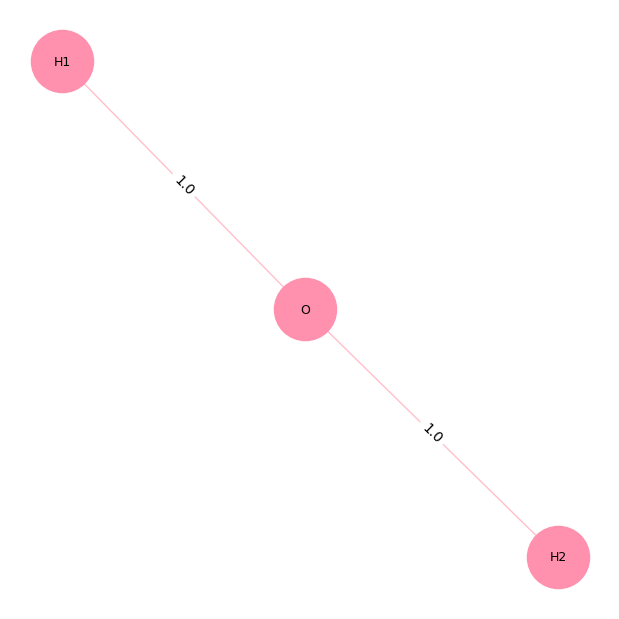

In [296]:
graph.visualize()